In [1]:
import sys
import os
from glob import glob
sys.path.append("../")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
#Input the training directory containing training image patches and labels 
TrainDataDir = '/home/sancere/Kepler/FinalONEATTraining/StaticZeroConf/'
#Directory containing the train category json, model parameter and weight vector file
ModelDir = '/home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORStaticONEAT.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

In [3]:
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Training epochs, longer the better with proper chosen learning rate
epochs = 150
#Size of the gradient descent length vector, start small and use callbacs to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Grid and number of boxes for yolo
gridX = 1
gridY = 1
ImageX = 64
ImageY = 64
nboxes = 1


In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = gridX, gridY = gridY, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=64, ImageY=64, ModelName='ORStaticONEAT.h5', batch_size=10, box_vector=4, categories=4, depth=29, epochs=150, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=1, residual=True, start_kernel=3, startfilter=32)


In [5]:
Train = NEATStaticDetection(config, TrainDataDir, KeyCategories, KeyCord, ModelDir, Model_Name, show = show)

Train.loadData()



number of  images:	 722
image size:		 (722, 64, 64, 1)
Labels:				 (722, 1, 1, 8)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
___________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 685 samples, validate on 37 samples
Epoch 1/150
685/685 [==============================] - 49s 72ms/step - loss: 8.4939 - accuracy: 0.0978 - val_loss: 8.0423 - val_accuracy: 0.0000e+00

Epoch 00001: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


<Figure size 432x288 with 0 Axes>

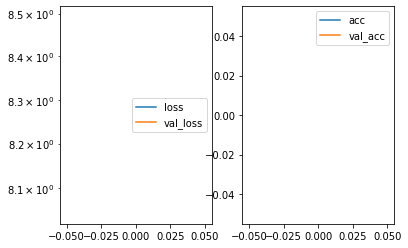

Prediction : [[[0.2407079  0.16997868 0.39428592 0.1950275  0.45737606 0.5395376
   0.2779273  0.43687105]]]
True Label :  [0.         0.         1.         0.         0.40612015 0.50417677
 0.484375   0.546875  ]


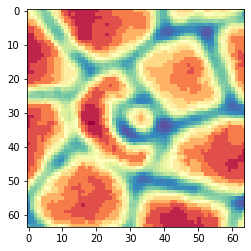

Epoch 2/150
685/685 [==============================] - 43s 63ms/step - loss: 7.1959 - accuracy: 0.2467 - val_loss: 7.6414 - val_accuracy: 0.0000e+00

Epoch 00002: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


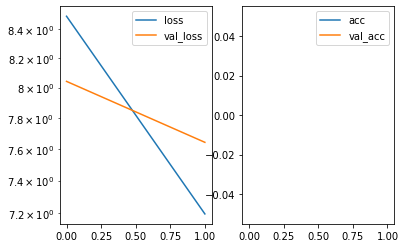

Prediction : [[[0.24279834 0.251724   0.32537043 0.18010724 0.31209472 0.5167394
   0.15236503 0.27615362]]]
True Label :  [1.         0.         0.         0.         0.50964588 0.48364826
 0.3125     0.515625  ]


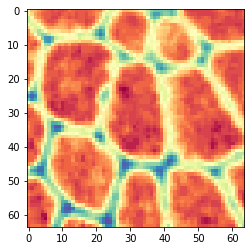

Epoch 3/150
685/685 [==============================] - 43s 62ms/step - loss: 6.5195 - accuracy: 0.4102 - val_loss: 6.9077 - val_accuracy: 0.0811

Epoch 00003: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


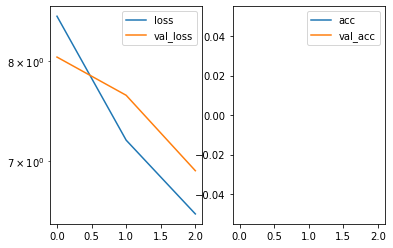

Prediction : [[[0.2091382  0.22383554 0.43949115 0.12753515 0.2427307  0.43913648
   0.15647572 0.29333758]]]
True Label :  [0.         0.         1.         0.         0.50338376 0.50189092
 0.21875    0.25      ]


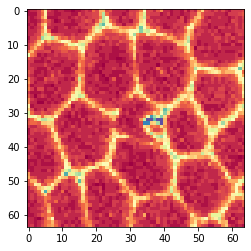

Epoch 4/150
685/685 [==============================] - 43s 62ms/step - loss: 5.8881 - accuracy: 0.4526 - val_loss: 6.4898 - val_accuracy: 0.1081

Epoch 00004: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


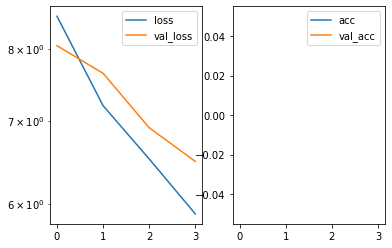

Prediction : [[[0.19786437 0.22648443 0.46393386 0.11171729 0.2525535  0.5247558
   0.24545819 0.24333975]]]
True Label :  [0.         0.         1.         0.         0.4883982  0.48072605
 0.21875    0.28125   ]


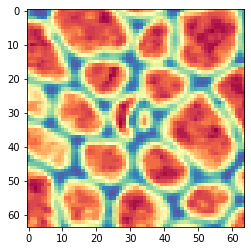

Epoch 5/150
685/685 [==============================] - 43s 62ms/step - loss: 5.3402 - accuracy: 0.4920 - val_loss: 5.7591 - val_accuracy: 0.1892

Epoch 00005: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


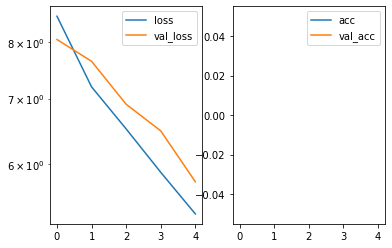

Prediction : [[[0.14878485 0.17235608 0.6031112  0.07574791 0.257497   0.60702705
   0.27391547 0.23367745]]]
True Label :  [0.         0.         0.         1.         0.54630429 0.4723439
 0.53125    0.6875    ]


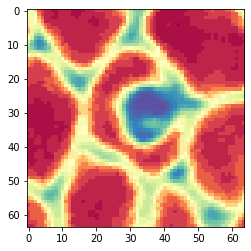

Epoch 6/150
685/685 [==============================] - 42s 62ms/step - loss: 4.9033 - accuracy: 0.5153 - val_loss: 4.9997 - val_accuracy: 0.3784

Epoch 00006: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


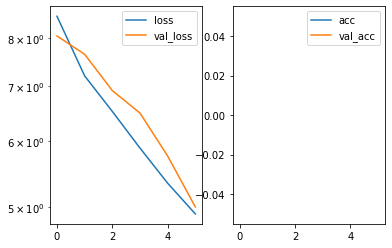

Prediction : [[[0.1056323  0.10474856 0.7391804  0.05043878 0.21572351 0.5938529
   0.25535586 0.28263974]]]
True Label :  [0.         0.         1.         0.         0.51504011 0.50167112
 0.265625   0.25      ]


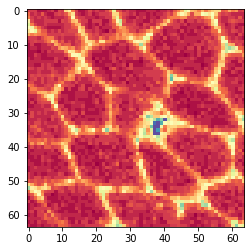

Epoch 7/150
685/685 [==============================] - 42s 61ms/step - loss: 4.5053 - accuracy: 0.5869 - val_loss: 4.4578 - val_accuracy: 0.5405

Epoch 00007: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


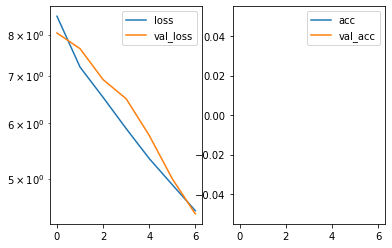

Prediction : [[[0.06415531 0.06714679 0.8460304  0.02266753 0.22259417 0.6233443
   0.24095726 0.2794017 ]]]
True Label :  [0.         0.         1.         0.         0.64684416 0.43025288
 0.34375    0.296875  ]


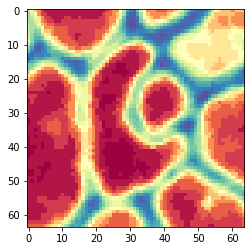

Epoch 8/150
685/685 [==============================] - 41s 60ms/step - loss: 4.1586 - accuracy: 0.6248 - val_loss: 4.1600 - val_accuracy: 0.6216

Epoch 00008: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


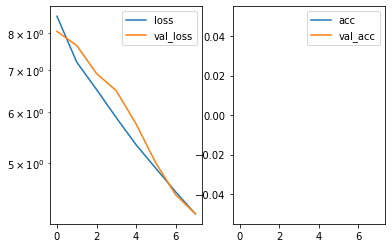

Prediction : [[[0.04535515 0.04886388 0.89366096 0.01212001 0.21093038 0.58510375
   0.26207805 0.32282388]]]
True Label :  [0.         0.         1.         0.         0.49039026 0.51203052
 0.40625    0.34375   ]


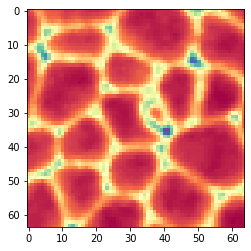

Epoch 9/150
685/685 [==============================] - 42s 61ms/step - loss: 3.9931 - accuracy: 0.6657 - val_loss: 3.9799 - val_accuracy: 0.6486

Epoch 00009: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


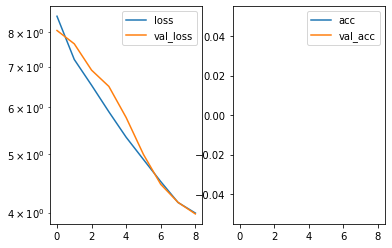

Prediction : [[[0.03159181 0.04243328 0.91778207 0.00819276 0.1825316  0.58273125
   0.3006912  0.37999424]]]
True Label :  [0.         0.         1.         0.         0.49107143 0.47602513
 0.25       0.265625  ]


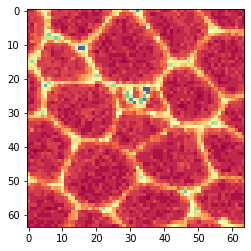

Epoch 10/150
685/685 [==============================] - 42s 61ms/step - loss: 3.7276 - accuracy: 0.6934 - val_loss: 3.8299 - val_accuracy: 0.7027

Epoch 00010: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


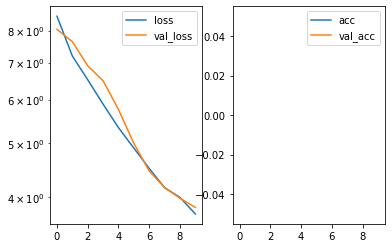

Prediction : [[[0.02788164 0.03885218 0.92686486 0.00640129 0.18657148 0.58220065
   0.2935797  0.3910015 ]]]
True Label :  [0.         0.         1.         0.         0.62628265 0.45137593
 0.296875   0.3125    ]


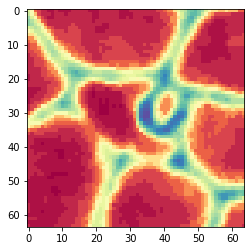

Epoch 11/150
685/685 [==============================] - 41s 60ms/step - loss: 3.6274 - accuracy: 0.7124 - val_loss: 3.7054 - val_accuracy: 0.7568

Epoch 00011: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


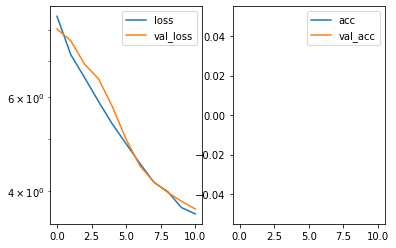

Prediction : [[[0.02893908 0.04092022 0.9241791  0.00596172 0.18949324 0.6210397
   0.25740325 0.38347962]]]
True Label :  [0.         0.         1.         0.         0.49039026 0.51203052
 0.40625    0.34375   ]


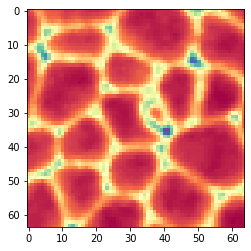

Epoch 12/150
685/685 [==============================] - 41s 59ms/step - loss: 3.4456 - accuracy: 0.7401 - val_loss: 3.6052 - val_accuracy: 0.7568

Epoch 00012: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


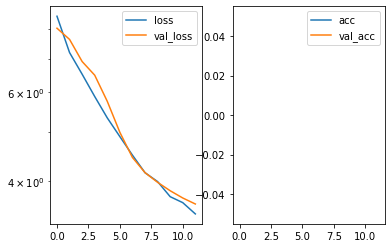

Prediction : [[[0.02872469 0.0405894  0.9252389  0.005447   0.18661743 0.611601
   0.25023144 0.3872484 ]]]
True Label :  [1.         0.         0.         0.         0.51175861 0.50693559
 0.421875   0.3125    ]


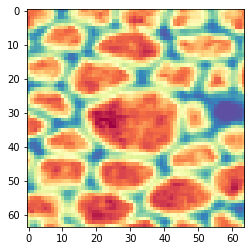

Epoch 13/150
685/685 [==============================] - 41s 60ms/step - loss: 3.2913 - accuracy: 0.7664 - val_loss: 3.5229 - val_accuracy: 0.7568

Epoch 00013: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


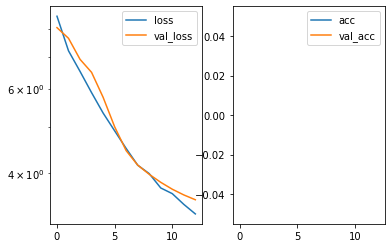

Prediction : [[[0.02771863 0.04016807 0.9271973  0.00491594 0.1861772  0.623499
   0.24998033 0.36845666]]]
True Label :  [0.         0.         1.         0.         0.40612015 0.50417677
 0.484375   0.546875  ]


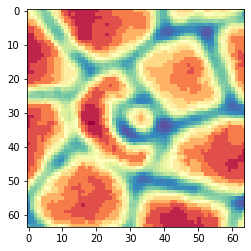

Epoch 14/150
685/685 [==============================] - 41s 60ms/step - loss: 3.1378 - accuracy: 0.7869 - val_loss: 3.4283 - val_accuracy: 0.7838

Epoch 00014: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


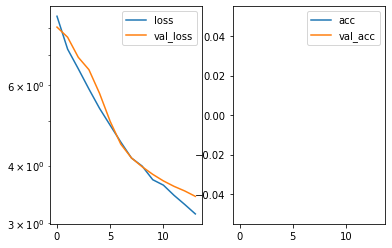

Prediction : [[[0.02500394 0.03672123 0.93406117 0.00421361 0.19095588 0.6275363
   0.2654447  0.40320817]]]
True Label :  [1.         0.         0.         0.         0.48383621 0.50003367
 0.46875    0.390625  ]


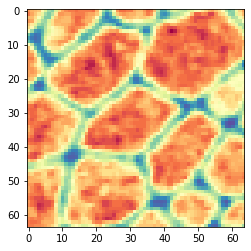

Epoch 15/150
685/685 [==============================] - 42s 61ms/step - loss: 3.1338 - accuracy: 0.8015 - val_loss: 3.3277 - val_accuracy: 0.7838

Epoch 00015: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


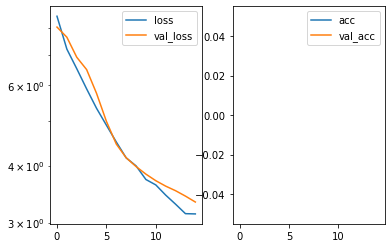

Prediction : [[[0.02208732 0.03275274 0.941532   0.0036279  0.19226244 0.61567366
   0.2727887  0.39629072]]]
True Label :  [0.         0.         0.         1.         0.56673271 0.45713256
 0.578125   0.609375  ]


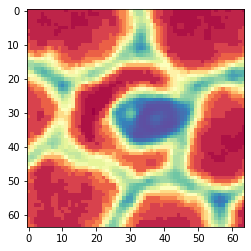

Epoch 16/150
685/685 [==============================] - 41s 60ms/step - loss: 2.9652 - accuracy: 0.8102 - val_loss: 3.2558 - val_accuracy: 0.8108

Epoch 00016: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


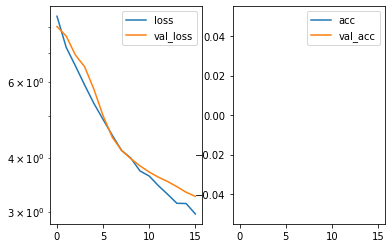

Prediction : [[[0.02372508 0.03300329 0.93964905 0.00362253 0.18815407 0.6268263
   0.2754873  0.41882673]]]
True Label :  [1.         0.         0.         0.         0.46500109 0.45525941
 0.46875    0.421875  ]


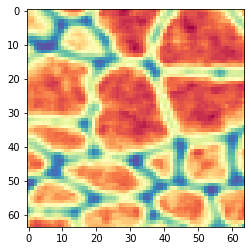

Epoch 17/150
685/685 [==============================] - 41s 60ms/step - loss: 2.8889 - accuracy: 0.8277 - val_loss: 3.1932 - val_accuracy: 0.8108

Epoch 00017: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


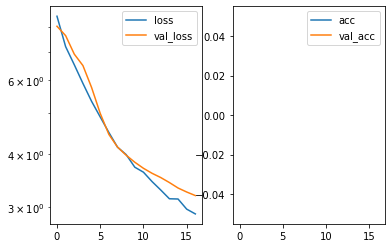

Prediction : [[[0.02352703 0.03132744 0.9417591  0.00338644 0.19027135 0.6184448
   0.2678303  0.41141915]]]
True Label :  [0.         0.         1.         0.         0.49107143 0.47602513
 0.25       0.265625  ]


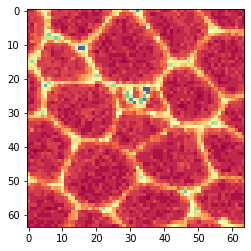

Epoch 18/150
685/685 [==============================] - 41s 60ms/step - loss: 2.7996 - accuracy: 0.8409 - val_loss: 3.1372 - val_accuracy: 0.8108

Epoch 00018: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


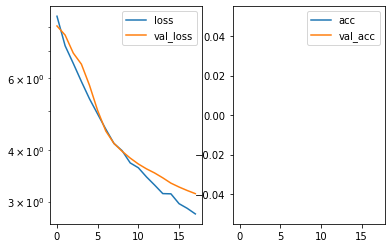

Prediction : [[[0.02281042 0.03017034 0.94385856 0.00316067 0.20355722 0.62209535
   0.26131624 0.41812235]]]
True Label :  [0.         0.         1.         0.         0.48932292 0.49019097
 0.25       0.296875  ]


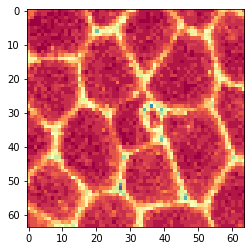

Epoch 19/150
685/685 [==============================] - 41s 59ms/step - loss: 2.7907 - accuracy: 0.8336 - val_loss: 3.0902 - val_accuracy: 0.8108

Epoch 00019: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


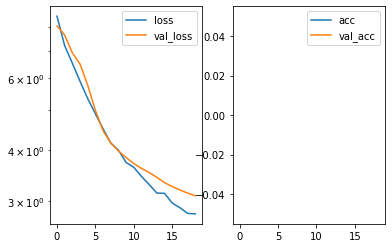

Prediction : [[[0.02368723 0.03047094 0.9428087  0.00303323 0.2036249  0.62125707
   0.26519197 0.41972598]]]
True Label :  [0.         0.         1.         0.         0.64684416 0.43025288
 0.34375    0.296875  ]


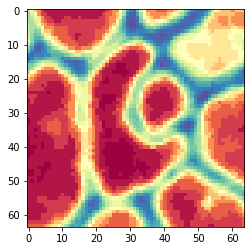

Epoch 20/150
685/685 [==============================] - 41s 60ms/step - loss: 2.6722 - accuracy: 0.8555 - val_loss: 3.0516 - val_accuracy: 0.8108

Epoch 00020: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


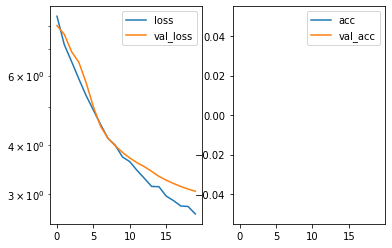

Prediction : [[[0.02184462 0.02779569 0.9476729  0.00268675 0.1951251  0.6343813
   0.27825564 0.4321072 ]]]
True Label :  [0.         0.         0.         1.         0.52384172 0.45874
 0.625      0.59375   ]


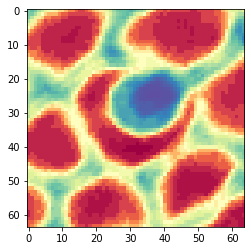

Epoch 21/150
685/685 [==============================] - 41s 60ms/step - loss: 2.6216 - accuracy: 0.8672 - val_loss: 2.9999 - val_accuracy: 0.8378

Epoch 00021: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


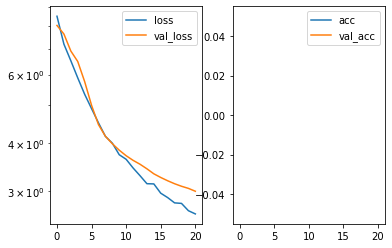

Prediction : [[[0.02131832 0.02872327 0.9472362  0.00272227 0.18862283 0.63194656
   0.2626534  0.43678513]]]
True Label :  [0.         0.         1.         0.         0.50338376 0.50189092
 0.21875    0.25      ]


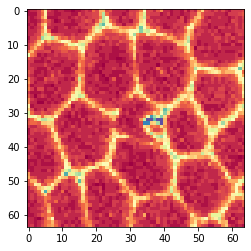

Epoch 22/150
685/685 [==============================] - 41s 59ms/step - loss: 2.5552 - accuracy: 0.8847 - val_loss: 2.9685 - val_accuracy: 0.8378

Epoch 00022: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


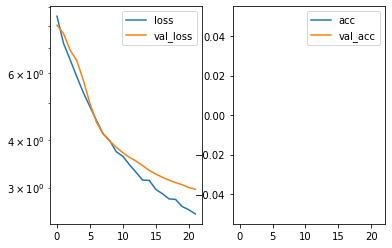

Prediction : [[[0.02073181 0.02855318 0.9480157  0.00269935 0.17255995 0.6186989
   0.27721018 0.44359347]]]
True Label :  [1.         0.         0.         0.         0.50964588 0.48364826
 0.3125     0.515625  ]


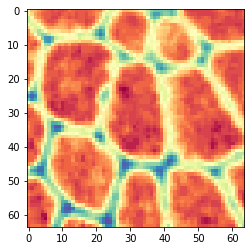

Epoch 23/150
685/685 [==============================] - 41s 59ms/step - loss: 2.5338 - accuracy: 0.8759 - val_loss: 2.9362 - val_accuracy: 0.8649

Epoch 00023: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


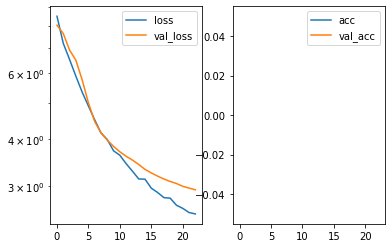

Prediction : [[[0.02068187 0.02771523 0.94900066 0.00260226 0.18251124 0.62620294
   0.27789375 0.43079302]]]
True Label :  [0.         0.         1.         0.         0.62628265 0.45137593
 0.296875   0.3125    ]


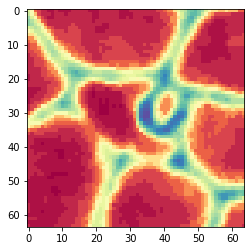

Epoch 24/150
685/685 [==============================] - 41s 59ms/step - loss: 2.5068 - accuracy: 0.8715 - val_loss: 2.9005 - val_accuracy: 0.8649

Epoch 00024: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


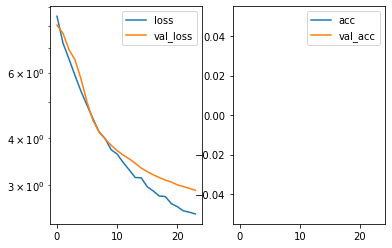

Prediction : [[[0.02091007 0.02737038 0.94921654 0.00250302 0.18983915 0.6310365
   0.26407695 0.42003983]]]
True Label :  [1.         0.         0.         0.         0.53332412 0.48727876
 0.328125   0.234375  ]


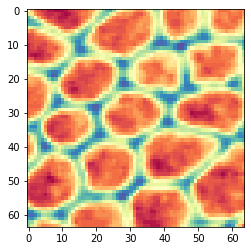

Epoch 25/150
685/685 [==============================] - 41s 60ms/step - loss: 2.5095 - accuracy: 0.8672 - val_loss: 2.8640 - val_accuracy: 0.8378

Epoch 00025: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


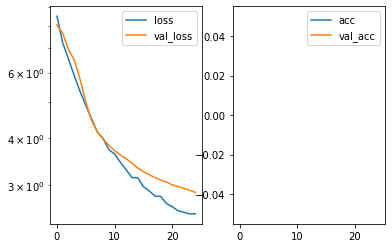

Prediction : [[[0.02083375 0.026368   0.95040023 0.00239807 0.1957447  0.6388859
   0.2569785  0.41772866]]]
True Label :  [0.         0.         0.         1.         0.54630429 0.4723439
 0.53125    0.6875    ]


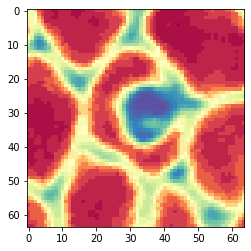

Epoch 26/150
685/685 [==============================] - 41s 60ms/step - loss: 2.4199 - accuracy: 0.8818 - val_loss: 2.8245 - val_accuracy: 0.8649

Epoch 00026: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


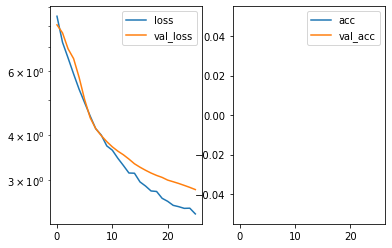

Prediction : [[[0.01995885 0.02439917 0.95340073 0.00224127 0.19700506 0.63505316
   0.27216804 0.41710243]]]
True Label :  [0.         0.         1.         0.         0.49039026 0.51203052
 0.40625    0.34375   ]


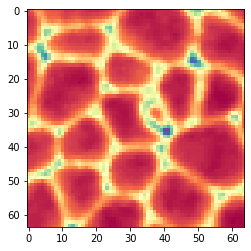

Epoch 27/150
685/685 [==============================] - 41s 60ms/step - loss: 2.3726 - accuracy: 0.8905 - val_loss: 2.8085 - val_accuracy: 0.8919

Epoch 00027: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


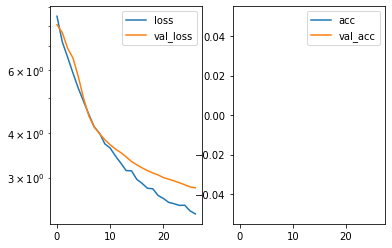

Prediction : [[[0.01893738 0.02319062 0.95580846 0.0020636  0.19522485 0.6318613
   0.2516983  0.41391605]]]
True Label :  [1.         0.         0.         0.         0.5330063  0.49721415
 0.34375    0.265625  ]


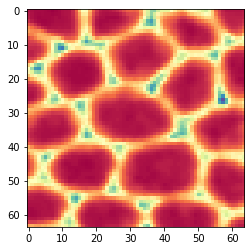

Epoch 28/150
685/685 [==============================] - 41s 60ms/step - loss: 2.2642 - accuracy: 0.9022 - val_loss: 2.8004 - val_accuracy: 0.8919

Epoch 00028: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


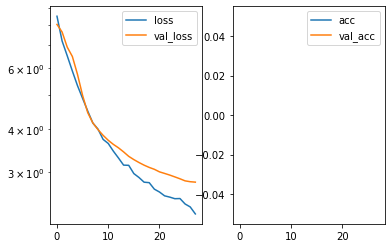

Prediction : [[[0.01835957 0.02293784 0.9566957  0.00200694 0.18820825 0.63220453
   0.24648964 0.43483013]]]
True Label :  [0.         0.         0.         1.         0.56308696 0.48587763
 0.84375    0.5625    ]


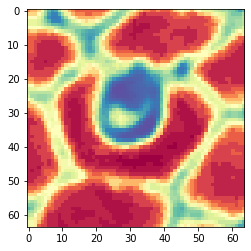

Epoch 29/150
685/685 [==============================] - 41s 59ms/step - loss: 2.2799 - accuracy: 0.9095 - val_loss: 2.7899 - val_accuracy: 0.8919

Epoch 00029: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


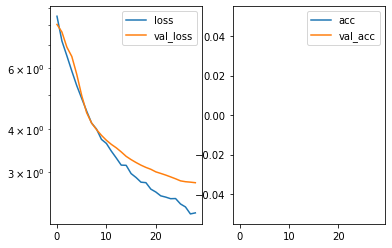

Prediction : [[[0.01775998 0.02209035 0.95819926 0.00195038 0.17749685 0.63786
   0.2549004  0.4472226 ]]]
True Label :  [0.         0.         0.         1.         0.56673271 0.45713256
 0.578125   0.609375  ]


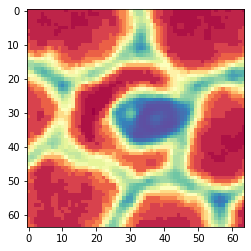

Epoch 30/150
685/685 [==============================] - 41s 59ms/step - loss: 2.2115 - accuracy: 0.9036 - val_loss: 2.7838 - val_accuracy: 0.8919

Epoch 00030: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


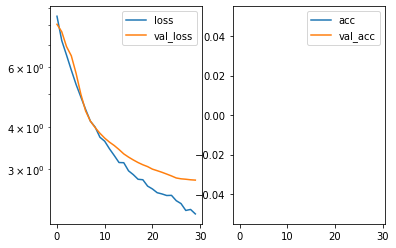

Prediction : [[[0.01768693 0.02200215 0.958395   0.00191599 0.1837981  0.6486268
   0.2453644  0.4299094 ]]]
True Label :  [1.      0.      0.      0.      0.5     0.5     0.15625 0.15625]


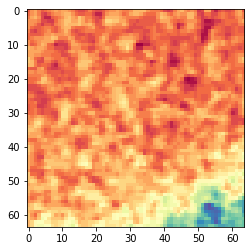

Epoch 31/150
685/685 [==============================] - 41s 60ms/step - loss: 2.1877 - accuracy: 0.9109 - val_loss: 2.7689 - val_accuracy: 0.8649

Epoch 00031: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


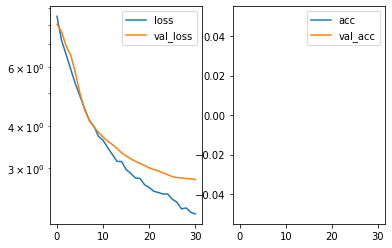

Prediction : [[[0.01666538 0.02118037 0.9603202  0.00183404 0.18122262 0.6455548
   0.25343686 0.4475708 ]]]
True Label :  [0.         0.         1.         0.         0.45495924 0.52241848
 0.28125    0.296875  ]


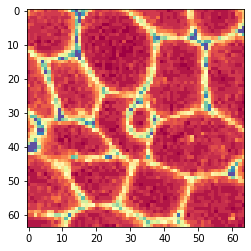

Epoch 32/150
685/685 [==============================] - 41s 60ms/step - loss: 2.1362 - accuracy: 0.9212 - val_loss: 2.7319 - val_accuracy: 0.8649

Epoch 00032: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


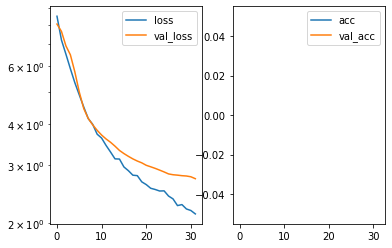

Prediction : [[[0.01661977 0.02068227 0.9608999  0.00179811 0.19320703 0.6449464
   0.260925   0.4540008 ]]]
True Label :  [0.         0.         0.         1.         0.56308696 0.48587763
 0.84375    0.5625    ]


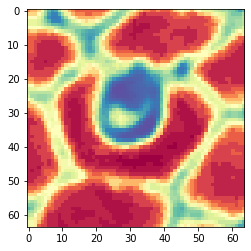

Epoch 33/150
685/685 [==============================] - 41s 60ms/step - loss: 2.1377 - accuracy: 0.9197 - val_loss: 2.7092 - val_accuracy: 0.8649

Epoch 00033: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


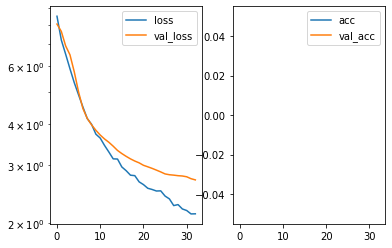

Prediction : [[[0.01528498 0.01922178 0.96384954 0.00164381 0.18778348 0.6413621
   0.26450533 0.44628698]]]
True Label :  [1.         0.         0.         0.         0.52757746 0.54811031
 0.40625    0.359375  ]


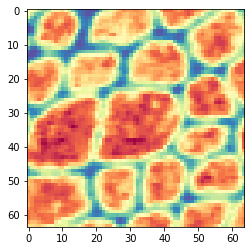

Epoch 34/150
685/685 [==============================] - 41s 60ms/step - loss: 2.1482 - accuracy: 0.9226 - val_loss: 2.6863 - val_accuracy: 0.8649

Epoch 00034: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


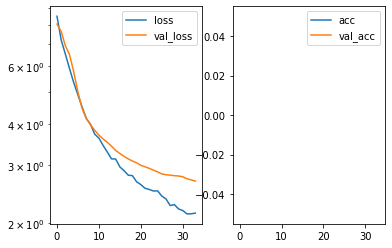

Prediction : [[[0.01488045 0.01860593 0.9649678  0.0015458  0.18229142 0.61817765
   0.27438504 0.4523061 ]]]
True Label :  [1.         0.         0.         0.         0.50964588 0.48364826
 0.3125     0.515625  ]


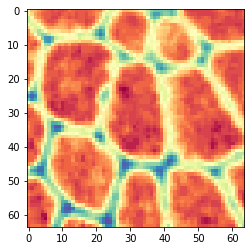

Epoch 35/150
685/685 [==============================] - 41s 60ms/step - loss: 2.1039 - accuracy: 0.9226 - val_loss: 2.6649 - val_accuracy: 0.8649

Epoch 00035: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


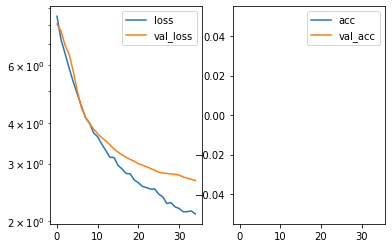

Prediction : [[[0.01408754 0.01771699 0.9667377  0.00145781 0.18326804 0.6396091
   0.26302344 0.46512836]]]
True Label :  [0.         0.         1.         0.         0.45885791 0.48133993
 0.25       0.234375  ]


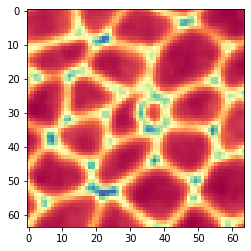

Epoch 36/150
685/685 [==============================] - 41s 60ms/step - loss: 2.0623 - accuracy: 0.9212 - val_loss: 2.6340 - val_accuracy: 0.9189

Epoch 00036: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


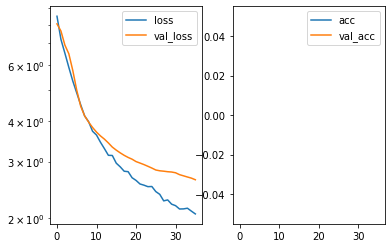

Prediction : [[[0.01359659 0.01751388 0.9674489  0.00144072 0.18004283 0.6357784
   0.24935144 0.44543117]]]
True Label :  [0.         0.         1.         0.         0.64684416 0.43025288
 0.34375    0.296875  ]


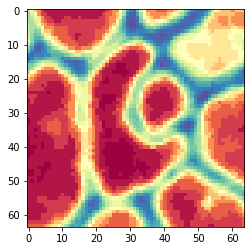

Epoch 37/150
685/685 [==============================] - 41s 60ms/step - loss: 2.0433 - accuracy: 0.9299 - val_loss: 2.6282 - val_accuracy: 0.9189

Epoch 00037: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


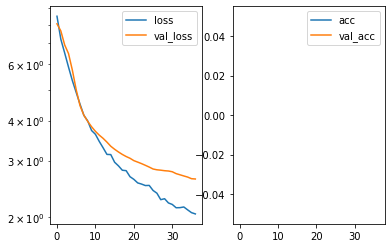

Prediction : [[[0.0140952  0.01758157 0.9668674  0.00145588 0.18165198 0.6390228
   0.25838023 0.44649595]]]
True Label :  [0.         0.         1.         0.         0.4883982  0.48072605
 0.21875    0.28125   ]


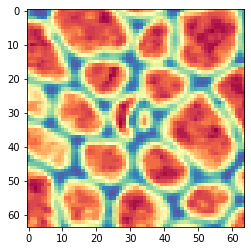

Epoch 38/150
685/685 [==============================] - 41s 60ms/step - loss: 2.0187 - accuracy: 0.9343 - val_loss: 2.6193 - val_accuracy: 0.9189

Epoch 00038: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


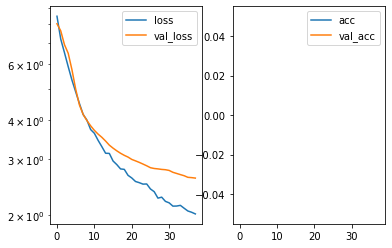

Prediction : [[[0.01396686 0.01753983 0.9670399  0.00145348 0.19398496 0.64531225
   0.2697595  0.45516214]]]
True Label :  [1.      0.      0.      0.      0.5     0.5     0.15625 0.15625]


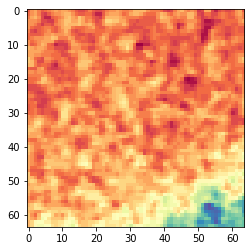

Epoch 39/150
685/685 [==============================] - 41s 60ms/step - loss: 1.9912 - accuracy: 0.9489 - val_loss: 2.6074 - val_accuracy: 0.9189

Epoch 00039: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


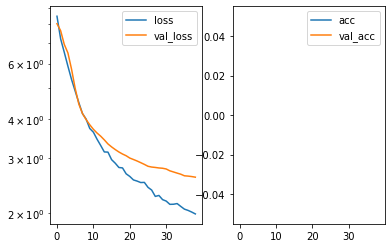

Prediction : [[[0.01391757 0.01737228 0.96728235 0.00142791 0.1969924  0.6476705
   0.2621534  0.4570336 ]]]
True Label :  [0.         0.         1.         0.         0.50338376 0.50189092
 0.21875    0.25      ]


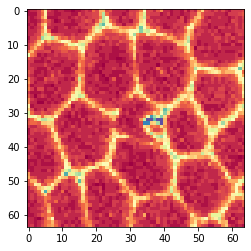

Epoch 40/150
685/685 [==============================] - 41s 59ms/step - loss: 2.0248 - accuracy: 0.9343 - val_loss: 2.6058 - val_accuracy: 0.9189

Epoch 00040: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


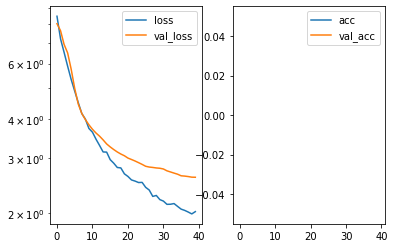

Prediction : [[[0.01318127 0.01686457 0.96858674 0.00136744 0.19306272 0.63879085
   0.26157564 0.45962074]]]
True Label :  [1.         0.         0.         0.         0.50964588 0.48364826
 0.3125     0.515625  ]


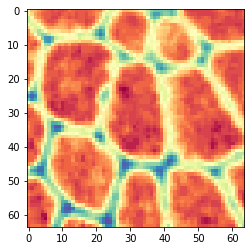

Epoch 41/150
685/685 [==============================] - 41s 60ms/step - loss: 1.9849 - accuracy: 0.9372 - val_loss: 2.5795 - val_accuracy: 0.9189

Epoch 00041: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


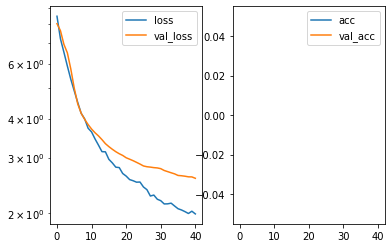

Prediction : [[[0.01239301 0.01556636 0.97080654 0.00123412 0.19532642 0.6358993
   0.28154105 0.46900383]]]
True Label :  [0.         0.         1.         0.         0.62628265 0.45137593
 0.296875   0.3125    ]


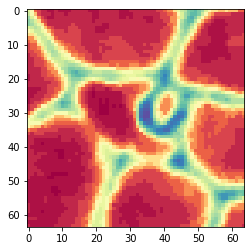

Epoch 42/150
685/685 [==============================] - 41s 60ms/step - loss: 1.9395 - accuracy: 0.9504 - val_loss: 2.5528 - val_accuracy: 0.9189

Epoch 00042: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


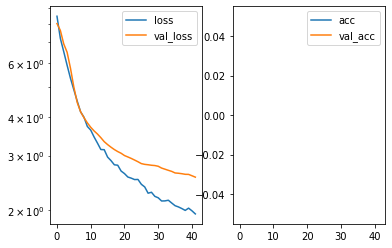

Prediction : [[[0.01191956 0.01509482 0.9718033  0.00118231 0.20419723 0.6417972
   0.28071457 0.4619901 ]]]
True Label :  [1.         0.         0.         0.         0.52757746 0.54811031
 0.40625    0.359375  ]


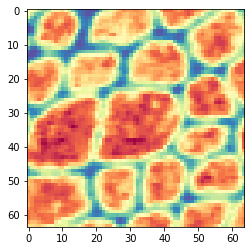

Epoch 43/150
685/685 [==============================] - 41s 60ms/step - loss: 1.9087 - accuracy: 0.9474 - val_loss: 2.5447 - val_accuracy: 0.9189

Epoch 00043: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


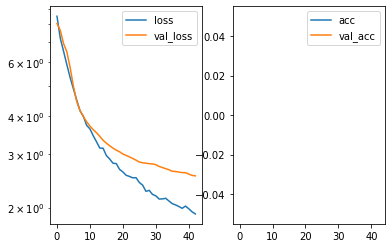

Prediction : [[[0.01179526 0.0145983  0.97242785 0.00117862 0.20529589 0.6353953
   0.2812897  0.47555375]]]
True Label :  [0.         1.         0.         0.         0.44990125 0.50885804
 0.375      0.484375  ]


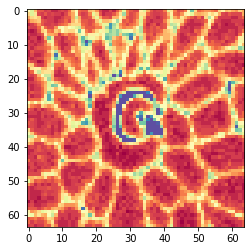

Epoch 44/150
685/685 [==============================] - 41s 60ms/step - loss: 1.8926 - accuracy: 0.9504 - val_loss: 2.5422 - val_accuracy: 0.9189

Epoch 00044: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


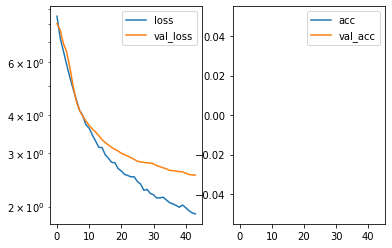

Prediction : [[[0.01181272 0.01438962 0.972615   0.00118263 0.21242905 0.65153384
   0.2750494  0.47373167]]]
True Label :  [0.         0.         1.         0.         0.54799006 0.5532972
 0.53125    0.640625  ]


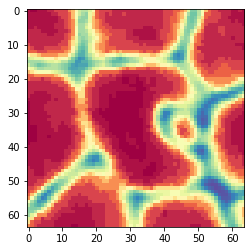

Epoch 45/150
685/685 [==============================] - 41s 60ms/step - loss: 1.9028 - accuracy: 0.9504 - val_loss: 2.5221 - val_accuracy: 0.9189

Epoch 00045: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


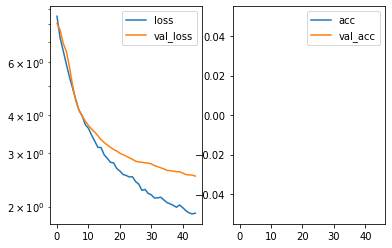

Prediction : [[[0.01149126 0.01412675 0.9732227  0.00115931 0.20677063 0.63960344
   0.2675775  0.46279198]]]
True Label :  [1.         0.         0.         0.         0.51175861 0.50693559
 0.421875   0.3125    ]


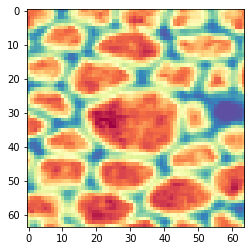

Epoch 46/150
685/685 [==============================] - 41s 60ms/step - loss: 1.8837 - accuracy: 0.9489 - val_loss: 2.5190 - val_accuracy: 0.9189

Epoch 00046: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


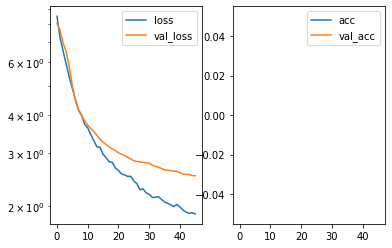

Prediction : [[[0.01126154 0.01403566 0.9735465  0.00115639 0.19518384 0.63385725
   0.26027197 0.4616212 ]]]
True Label :  [0.         0.         1.         0.         0.64684416 0.43025288
 0.34375    0.296875  ]


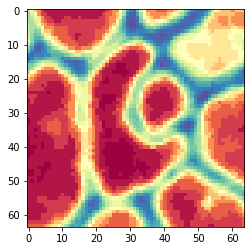

Epoch 47/150
685/685 [==============================] - 41s 60ms/step - loss: 1.8695 - accuracy: 0.9460 - val_loss: 2.5023 - val_accuracy: 0.9189

Epoch 00047: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


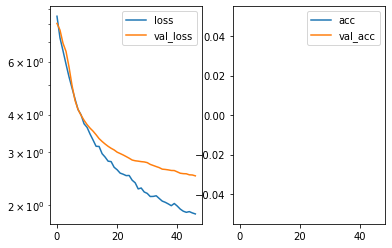

Prediction : [[[0.01141758 0.0138433  0.97357464 0.00116452 0.18326059 0.62412405
   0.26419905 0.46338436]]]
True Label :  [0.         0.         1.         0.         0.49039026 0.51203052
 0.40625    0.34375   ]


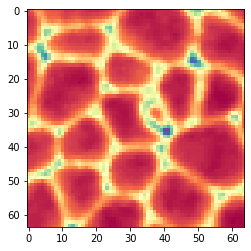

Epoch 48/150
685/685 [==============================] - 41s 60ms/step - loss: 1.8213 - accuracy: 0.9635 - val_loss: 2.4918 - val_accuracy: 0.9189

Epoch 00048: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


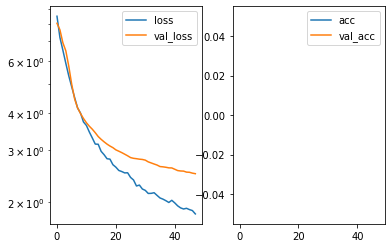

Prediction : [[[0.01119877 0.01356132 0.9741329  0.00110706 0.1926665  0.6228278
   0.26408905 0.45990515]]]
True Label :  [0.         0.         1.         0.         0.5531851  0.49829728
 0.34375    0.3125    ]


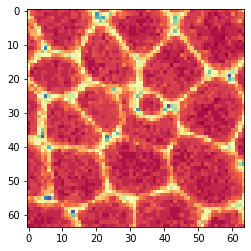

Epoch 49/150
685/685 [==============================] - 41s 60ms/step - loss: 1.8190 - accuracy: 0.9606 - val_loss: 2.4748 - val_accuracy: 0.9189

Epoch 00049: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


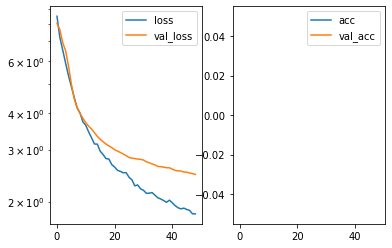

Prediction : [[[0.01057978 0.01289252 0.9755044  0.00102337 0.18655312 0.6452599
   0.27118266 0.46667948]]]
True Label :  [0.         0.         1.         0.         0.51504011 0.50167112
 0.265625   0.25      ]


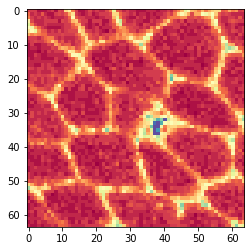

Epoch 50/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7822 - accuracy: 0.9620 - val_loss: 2.4657 - val_accuracy: 0.9189

Epoch 00050: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


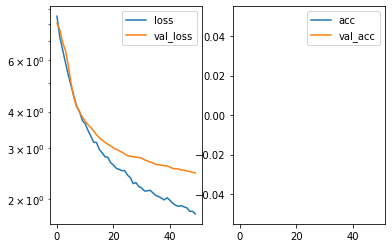

Prediction : [[[9.6382769e-03 1.2198649e-02 9.7720373e-01 9.5935666e-04 1.9645497e-01
   6.4207387e-01 2.7381518e-01 4.6532500e-01]]]
True Label :  [0.         0.         1.         0.         0.5639524  0.50138212
 0.46875    0.5       ]


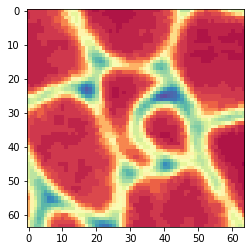

Epoch 51/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7650 - accuracy: 0.9650 - val_loss: 2.4543 - val_accuracy: 0.9189

Epoch 00051: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


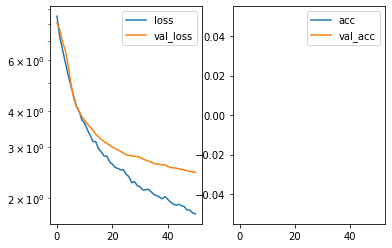

Prediction : [[[9.2380960e-03 1.1889738e-02 9.7794157e-01 9.3057088e-04 2.0601395e-01
   6.3989210e-01 2.7232280e-01 4.5172194e-01]]]
True Label :  [0.         0.         0.         1.         0.52384172 0.45874
 0.625      0.59375   ]


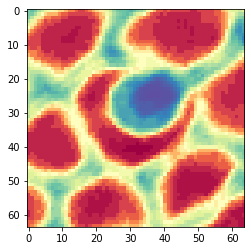

Epoch 52/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7700 - accuracy: 0.9650 - val_loss: 2.4425 - val_accuracy: 0.9189

Epoch 00052: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


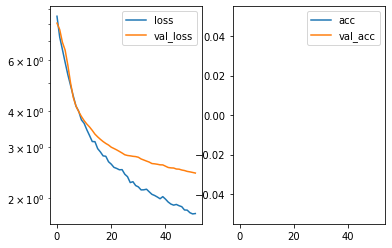

Prediction : [[[8.2365442e-03 1.1013151e-02 9.7988689e-01 8.6331862e-04 1.8604833e-01
   6.3320649e-01 2.7582335e-01 4.4922486e-01]]]
True Label :  [0.         0.         1.         0.         0.5639524  0.50138212
 0.46875    0.5       ]


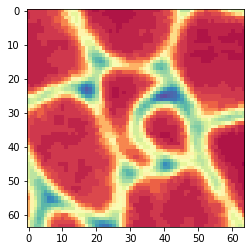

Epoch 53/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7640 - accuracy: 0.9620 - val_loss: 2.4407 - val_accuracy: 0.9189

Epoch 00053: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


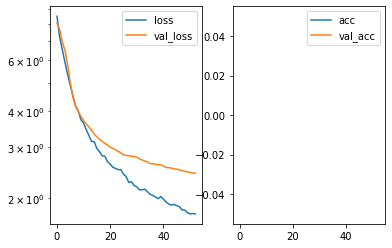

Prediction : [[[8.3697969e-03 1.1080125e-02 9.7970080e-01 8.4934174e-04 1.8318945e-01
   6.3785303e-01 2.7391329e-01 4.6365499e-01]]]
True Label :  [0.         0.         1.         0.         0.45495924 0.52241848
 0.28125    0.296875  ]


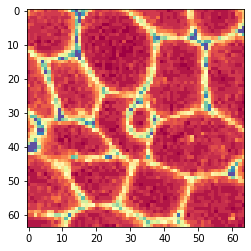

Epoch 54/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7901 - accuracy: 0.9474 - val_loss: 2.4463 - val_accuracy: 0.9189

Epoch 00054: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


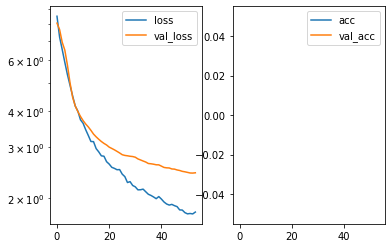

Prediction : [[[8.7061916e-03 1.1359185e-02 9.7908151e-01 8.5311086e-04 1.8384489e-01
   6.4907730e-01 2.7342027e-01 4.6426395e-01]]]
True Label :  [0.         0.         1.         0.         0.4883982  0.48072605
 0.21875    0.28125   ]


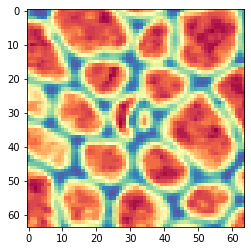

Epoch 55/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7463 - accuracy: 0.9650 - val_loss: 2.4525 - val_accuracy: 0.9189

Epoch 00055: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


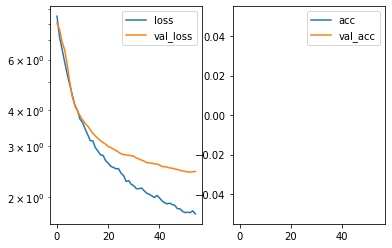

Prediction : [[[8.8029373e-03 1.1401004e-02 9.7893941e-01 8.5669302e-04 1.9026205e-01
   6.6652644e-01 2.6867610e-01 4.7078791e-01]]]
True Label :  [0.         0.         1.         0.         0.45102487 0.51293683
 0.234375   0.328125  ]


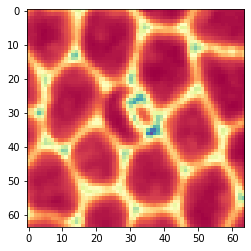

Epoch 56/150
685/685 [==============================] - 42s 61ms/step - loss: 1.7379 - accuracy: 0.9664 - val_loss: 2.4237 - val_accuracy: 0.9189

Epoch 00056: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


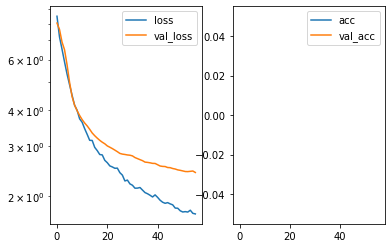

Prediction : [[[8.8870507e-03 1.1223137e-02 9.7904277e-01 8.4691675e-04 1.9435486e-01
   6.5307897e-01 2.6247013e-01 4.6362504e-01]]]
True Label :  [0.         1.         0.         0.         0.44990125 0.50885804
 0.375      0.484375  ]


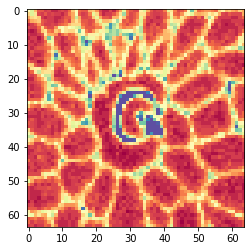

Epoch 57/150
685/685 [==============================] - 41s 60ms/step - loss: 1.7076 - accuracy: 0.9693 - val_loss: 2.4103 - val_accuracy: 0.9189

Epoch 00057: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


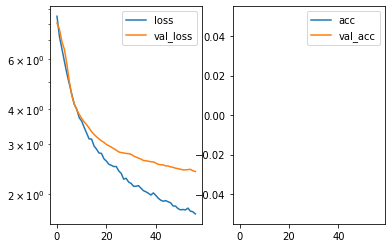

Prediction : [[[8.6490670e-03 1.0811861e-02 9.7973698e-01 8.0218335e-04 1.8114948e-01
   6.5968394e-01 2.6199770e-01 4.6313706e-01]]]
True Label :  [0.         0.         1.         0.         0.49107143 0.47602513
 0.25       0.265625  ]


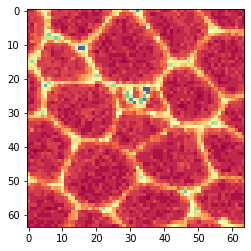

Epoch 58/150
685/685 [==============================] - 41s 60ms/step - loss: 1.6788 - accuracy: 0.9693 - val_loss: 2.3991 - val_accuracy: 0.9189

Epoch 00058: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


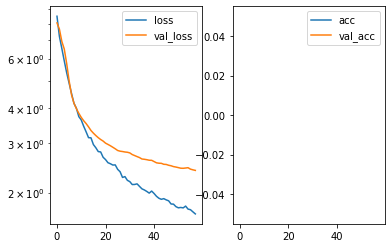

Prediction : [[[7.7069993e-03 1.0017548e-02 9.8155034e-01 7.2514295e-04 1.8228275e-01
   6.5730262e-01 2.5570223e-01 4.6800277e-01]]]
True Label :  [0.         0.         1.         0.         0.45885791 0.48133993
 0.25       0.234375  ]


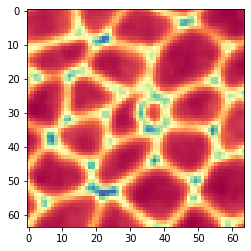

Epoch 59/150
685/685 [==============================] - 41s 60ms/step - loss: 1.6788 - accuracy: 0.9708 - val_loss: 2.3894 - val_accuracy: 0.9189

Epoch 00059: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


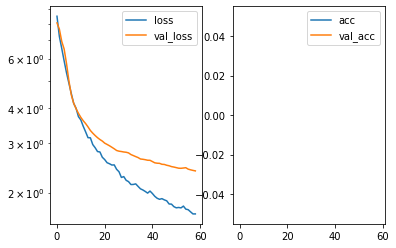

Prediction : [[[7.3243775e-03 9.4816405e-03 9.8249602e-01 6.9797714e-04 1.9536966e-01
   6.5928411e-01 2.5646067e-01 4.5342132e-01]]]
True Label :  [0.         0.         1.         0.         0.50338376 0.50189092
 0.21875    0.25      ]


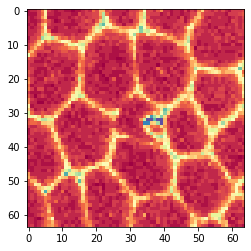

Epoch 60/150
685/685 [==============================] - 41s 60ms/step - loss: 1.6957 - accuracy: 0.9737 - val_loss: 2.3826 - val_accuracy: 0.9189

Epoch 00060: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


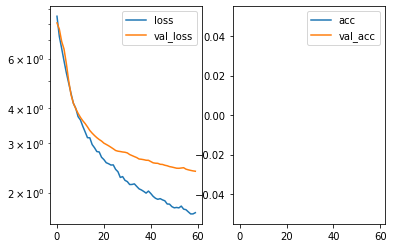

Prediction : [[[7.1641780e-03 9.3659619e-03 9.8277330e-01 6.9660717e-04 1.9657353e-01
   6.6411507e-01 2.6838928e-01 4.7246492e-01]]]
True Label :  [0.         0.         1.         0.         0.48462513 0.52931564
 0.484375   0.5625    ]


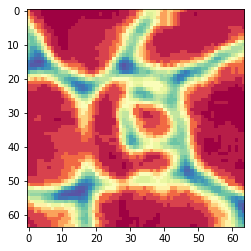

Epoch 61/150
685/685 [==============================] - 42s 61ms/step - loss: 1.6723 - accuracy: 0.9752 - val_loss: 2.3818 - val_accuracy: 0.9189

Epoch 00061: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


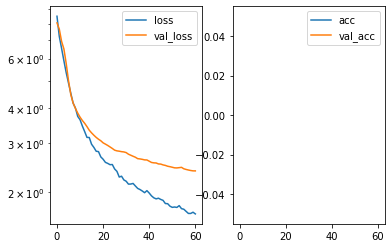

Prediction : [[[7.4773212e-03 9.6831396e-03 9.8210984e-01 7.2959805e-04 1.8989086e-01
   6.3244033e-01 2.6251969e-01 4.8150295e-01]]]
True Label :  [1.         0.         0.         0.         0.46500109 0.45525941
 0.46875    0.421875  ]


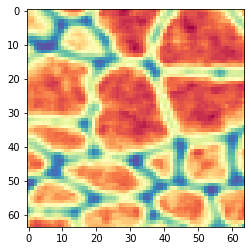

Epoch 62/150
685/685 [==============================] - 42s 61ms/step - loss: 1.6625 - accuracy: 0.9723 - val_loss: 2.3835 - val_accuracy: 0.9189

Epoch 00062: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


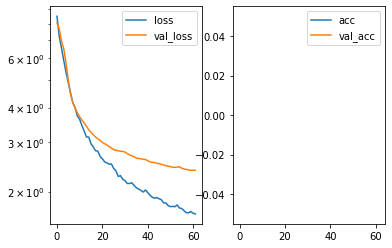

Prediction : [[[7.4712252e-03 9.4932495e-03 9.8232561e-01 7.0990983e-04 1.9364715e-01
   6.4993751e-01 2.7198046e-01 4.7571018e-01]]]
True Label :  [0.         0.         1.         0.         0.40612015 0.50417677
 0.484375   0.546875  ]


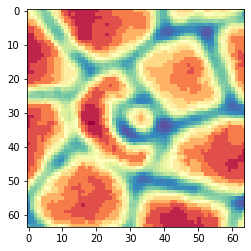

Epoch 63/150
685/685 [==============================] - 41s 60ms/step - loss: 1.6674 - accuracy: 0.9708 - val_loss: 2.3929 - val_accuracy: 0.9189

Epoch 00063: saving model to /home/sancere/Kepler/FinalONEATTraining/ZeroConfStaticNEATModel/ORStaticONEAT.h5


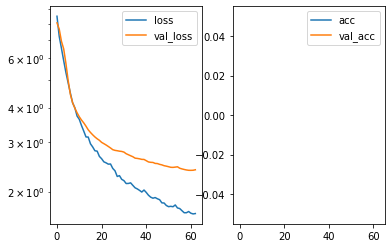

Prediction : [[[6.7207599e-03 8.9664282e-03 9.8364937e-01 6.6344428e-04 2.0037699e-01
   6.6407800e-01 2.7531880e-01 4.7248748e-01]]]
True Label :  [0.         0.         1.         0.         0.48137019 0.46854968
 0.25       0.3125    ]


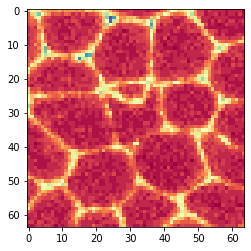

Epoch 64/150
 70/685 [==>...........................] - ETA: 36s - loss: 1.8353 - accuracy: 0.9571

KeyboardInterrupt: 

In [6]:
Train.TrainModel()